# Niederkongo

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

## Datierungen

In [2]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID""".replace('\n',' ')

#           [t_Komplex].[bef_nr] AS PHASE,  # wird von der der Liste weiter unten geliefert

df = pd.read_sql(sql, con)
# display(df.head())
len(df.index)

1385

Datierungen für die Mortelmann'schen-Gruppen - siehe de Maret 1982: 63f. &  :
* Group VI/Ngovo: Gosselain 1988: 15
* Group II: Gosselain 1988: 20f.
* Group X: Gosselain 1988: 22
* Group Gombe: Gosselain 1988: 19
* Kay Ladio: de Maret 1986: 125

In [3]:
d = {'Hv-5258': 'Group VI',
     'Hv-6258': 'Group VI',
     'Hv-6250': 'Group VI',
     'Hv-6257': 'Group VI',
     'Lv-1471': 'Group VI',
     'Hv-6259': 'Group II',
     'Hv-6262': 'Group II',
     'Gif-4219': 'Group II',
     'Gif-4220': 'Group II',
     'Gif-4221': 'Group II',
     'Hv-6260': 'Group III',
     'GrN-7218': 'Group X',
     'OxTL-209a': 'Group Gombe',
     'OxTL-209c': 'Group Gombe',
     'OxTL-209d': 'Group Gombe',
     'Lv-168': 'Group Gombe',
     'Lv-1468': 'Kay Ladio',
     'Lv-1469': 'Kay Ladio'
    }
df_gr = pd.Series(d)
df_gr = pd.DataFrame(df_gr).reset_index()
df_gr = df_gr.rename(columns={'index': 'LABNR', 0: 'PHASE'})

In [4]:
df_merge = pd.merge(df, df_gr, on='LABNR', how='inner')

df_merge.to_excel('../data/processed/3-2-2_Niederkongo_Gruppen.xlsx', sheet_name='Sheet1', engine='xlsxwriter')

df_merge.pivot_table(values = 'C14AGE', index = 'PHASE', aggfunc = [len, np.min, np.mean, np.max])

,len,amin,mean,amax
PHASE,,,,
Group Gombe,4,1540,1598.75,1645
Group II,5,230,295.00,370
Group III,1,425,425.00,425
Group VI,5,2035,2096.00,2155
Group X,1,220,220.00,220
Kay Ladio,2,1780,1815.00,1850


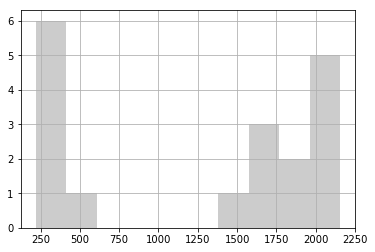

In [5]:
df_merge['C14AGE'].hist(histtype='stepfilled', fc='#CCCCCC')

14C-Datierte Fundplätze mit 'Groupe VI'-Keramik:

In [6]:
pd.DataFrame(df_merge[df_merge['PHASE'] == 'Group VI'].pivot_table(values = 'C14AGE', index = 'SITE', aggfunc = len))

,C14AGE
SITE,
Dimba,1
Ngovo,2
Ntadi Ntadi,1
Sakuzi,1


OxCal-fähige Datei:

In [7]:
print('''Plot()
{''')
for index, row in df_merge[df_merge['PHASE'] == 'Group VI'].iterrows():
#for index, row in df_merge[df_merge['PHASE'] == 'Group VI'].iterrows():
    print('R_Date("',row['SITE'], '-', row['PHASE'],'-', row['LABNR'],'",', row['C14AGE'],',', row['C14STD'],');')
print('};')

Plot()
{
R_Date(" Dimba - Group VI - Hv-6257 ", 2035 , 130 );
R_Date(" Ngovo - Group VI - Hv-5258 ", 2145 , 45 );
R_Date(" Ngovo - Group VI - Hv-6258 ", 2035 , 65 );
R_Date(" Sakuzi - Group VI - Lv-1471 ", 2110 , 55 );
R_Date(" Ntadi Ntadi - Group VI - Hv-6250 ", 2155 , 60 );
};


In [8]:
# da für Group III und X jeweils nur ein Datum vorliegt, müssen diese herausgefiltertn werden
df_merge_a = df_merge[(df_merge.PHASE == 'Group II') | (df_merge.PHASE == 'Group VI') | (df_merge.PHASE == 'Group Gombe') | (df_merge.PHASE == 'Kay Ladio')]

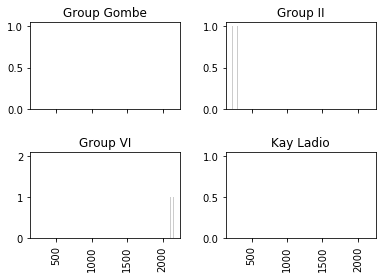

In [9]:
df_merge_a['C14AGE'].hist(by = df_merge_a['PHASE'], bins = 50, sharex = True, histtype='stepfilled', fc='#CCCCCC')
plt.show()

## Fundplätze

In [10]:
sql = """SELECT
           [t_Ort].[ort_name] AS SITE, 
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM t_Ort""".replace('\n',' ')

#           [t_Komplex].[bef_nr] AS PHASE,  # wird von der der Liste weiter unten geliefert

df = pd.read_sql(sql, con)
# display(df.head())
len(df.index)

930

> Gosselain 1988: 16

In [11]:
d = {'Sumbi': 'Group VI',
     'Kibula': 'Group VI',
     'Sakuzi': 'Group VI',
     'Kongo dia Vanga': 'Group VI',
     'Bangu': 'Group VI',
     'Mongo': 'Group VI',
     'Ntadi Ntadi': 'Group VI',
     'Lovo': 'Group VI',
     'Kwimba': 'Group VI',
     'Ngovo': 'Group VI',
     'Dimba': 'Group VI'}
df_gr = pd.Series(d)
df_gr = pd.DataFrame(df_gr).reset_index()
df_gr = df_gr.rename(columns={'index': 'SITE', 0: 'PHASE'})
df_gr

,SITE,PHASE
0,Bangu,Group VI
1,Dimba,Group VI
2,Kibula,Group VI
3,Kongo dia Vanga,Group VI
4,Kwimba,Group VI
5,Lovo,Group VI
6,Mongo,Group VI
7,Ngovo,Group VI
8,Ntadi Ntadi,Group VI
9,Sakuzi,Group VI


In [12]:
df_merge = pd.merge(df, df_gr, on='SITE', how='inner')
df_merge

,SITE,COUNTRY,LATITUDE,LONGITUDE,PHASE
0,Dimba,COD,-5.283333,14.866667,Group VI
1,Ngovo,COD,-5.308333,14.923611,Group VI
2,Sakuzi,COD,-5.167222,14.007500,Group VI
3,Ntadi Ntadi,COD,-5.745826,14.579839,Group VI
4,Lovo,COD,-5.733030,14.455420,Group VI
5,Bangu,COD,-5.544972,14.446232,Group VI
6,Kwimba,COD,-5.635787,14.877041,Group VI
7,Kongo dia Vanga,COD,-5.768174,13.699803,Group VI
8,Sumbi,COD,-4.985620,13.256150,Group VI
9,Kibula,COD,-5.180920,14.064480,Group VI


## Tafeln

In [13]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%LKW%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,76,1,LKW 186,87/186,NaN,"-1:3,13",LKW,E1,B1,None
1,76,2,LKW 186,87/186,NaN,-1:1,LKW,C1,B1,None
2,76,3,LKW 186,87/186,NaN,"-1:2,5",LKW,C1,B1,None
3,76,4,LKW 186,87/186,NaN,2,LKW,H2,C3,None
4,76,5,LKW 186,87/186,NaN,3,LKW,I3 (?),B3 (?),None
